In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

# Tree Based Models

from operator import itemgetter
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from xgboost import XGBRegressor

# Linear Regression Based Models

from sklearn.linear_model import ElasticNet, HuberRegressor, LinearRegression, Ridge, Lasso, SGDRegressor, PassiveAggressiveRegressor

# Metrics

from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# Parallel

from dask.distributed import Client
from sklearn.externals.joblib import parallel_backend
from dask_ml.model_selection import GridSearchCV

from feature_selection_helper import norm_cols

import warnings
warnings.filterwarnings("ignore")


/usr/local/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [52]:
stk = pd.read_csv("../data/train_processed_upsampled.csv")
stk.head()

,stroke_in_2018,average_blood_sugar,BMI,age_corr,high_BP_0,high_BP_1,smoker_status_active_smoker,smoker_status_non_smoker,smoker_status_quit,married_0,...,very_high_BMI,child,adult,senior,elderly,low_sugar,medium_sugar,high_sugar,very_high_sugar,has_smoked
0,0,71.67,36.6,61.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0,107.95,30.4,30.0,1.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0,76.49,42.1,51.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0,113.98,57.3,54.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0,70.60,26.7,27.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [53]:
stk.shape

(27364, 33)

In [54]:
X = stk.drop(labels="stroke_in_2018", axis=1).reset_index(drop=True)
y = stk["stroke_in_2018"].reset_index(drop=True)

X_norm = X.copy()
norm_cols(X_norm, ["average_blood_sugar", "BMI", "age_corr"])

In [55]:
X_norm.head()

,average_blood_sugar,BMI,age_corr,high_BP_0,high_BP_1,smoker_status_active_smoker,smoker_status_non_smoker,smoker_status_quit,married_0,married_1,...,very_high_BMI,child,adult,senior,elderly,low_sugar,medium_sugar,high_sugar,very_high_sugar,has_smoked
0,0.051093,0.298718,0.666667,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.204796,0.219231,0.236111,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.071513,0.369231,0.527778,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.230342,0.564103,0.569444,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.046560,0.171795,0.194444,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [70]:
stk2 = pd.read_csv("../data/train_processed_upsampled2.csv")
stk2.head()

X2 = stk2.drop(labels="stroke_in_2018", axis=1).reset_index(drop=True)
y2 = stk2["stroke_in_2018"].reset_index(drop=True)

X_norm2 = X2.copy()
norm_cols(X_norm2, ["average_blood_sugar", "BMI", "age_corr"])

In [71]:
stk3 = pd.read_csv("../data/train_processed_upsampled3.csv")
stk3.head()

X3 = stk3.drop(labels="stroke_in_2018", axis=1).reset_index(drop=True)
y3 = stk3["stroke_in_2018"].reset_index(drop=True)

X_norm3 = X3.copy()
norm_cols(X_norm3, ["average_blood_sugar", "BMI", "age_corr"])

In [101]:
stk4 = pd.read_csv("../data/train_processed_upsampled4.csv")
stk4.head()

X4 = stk4.drop(labels="stroke_in_2018", axis=1).reset_index(drop=True)
y4 = stk4["stroke_in_2018"].reset_index(drop=True)

X_norm4 = X4.copy()
norm_cols(X_norm4, ["average_blood_sugar", "BMI", "age_corr"])

In [56]:
stk_test = pd.read_csv("../data/test_processed_feature_engineered.csv")
stk_test.head()

,id,average_blood_sugar,BMI,age_corr,high_BP_0,high_BP_1,smoker_status_active_smoker,smoker_status_non_smoker,smoker_status_quit,married_0,...,very_high_BMI,child,adult,senior,elderly,low_sugar,medium_sugar,high_sugar,very_high_sugar,has_smoked
0,33327,76.05,33.4,36,1,0,1,0,0,0,...,1,0,1,0,0,1,0,0,0,0
1,839,73.77,30.1,40,1,0,0,1,0,0,...,1,0,1,0,0,1,0,0,0,0
2,11127,62.95,30.8,59,1,0,1,0,0,0,...,1,0,0,1,0,1,0,0,0,0
3,20768,68.81,36.5,33,1,0,0,0,1,0,...,1,0,1,0,0,1,0,0,0,0
4,37774,122.89,30.8,22,1,0,1,0,0,1,...,1,0,1,0,0,0,1,0,0,0


In [57]:
X_test = stk_test.copy()
X_test_norm = X_test.copy()
norm_cols(X_test_norm, ["average_blood_sugar", "BMI", "age_corr"])

In [58]:
X_test_norm.head()

,id,average_blood_sugar,BMI,age_corr,high_BP_0,high_BP_1,smoker_status_active_smoker,smoker_status_non_smoker,smoker_status_quit,married_0,...,very_high_BMI,child,adult,senior,elderly,low_sugar,medium_sugar,high_sugar,very_high_sugar,has_smoked
0,33327,0.075016,0.256410,0.402439,1,0,1,0,0,0,...,1,0,1,0,0,1,0,0,0,0
1,839,0.064606,0.216117,0.451220,1,0,0,1,0,0,...,1,0,1,0,0,1,0,0,0,0
2,11127,0.015204,0.224664,0.682927,1,0,1,0,0,0,...,1,0,0,1,0,1,0,0,0,0
3,20768,0.041960,0.294261,0.365854,1,0,0,0,1,0,...,1,0,1,0,0,1,0,0,0,0
4,37774,0.288878,0.224664,0.231707,1,0,1,0,0,1,...,1,0,1,0,0,0,1,0,0,0


In [59]:
linear_based_models = {
    "en": ElasticNet(),
    "hr": HuberRegressor(),
    "lr": LinearRegression(),
    "ridge": Ridge(),
    "lasso": Lasso(),
    "sgd": SGDRegressor(), 
    "pa": PassiveAggressiveRegressor()
}

tree_based_models = {
    "dt": DecisionTreeRegressor(),
    "rf": RandomForestRegressor(),
    "ada": AdaBoostRegressor(),
    "gb": GradientBoostingRegressor(),
    "et": ExtraTreesRegressor(),
    "xgb": XGBRegressor()
}

tree_model_best_features = [
    'BMI',
    'high_BMI',
    'average_blood_sugar',
    'age_corr',
    'job_status_corr_government'
]

linear_model_selected_features = [
    'low_sugar',
    'job_status_corr_government',
    'medium_sugar',
    'smoker_status_non_smoker',
    'high_BMI',
    'child',
    'BMI',
    'age_corr',
    'married_0',
    'medium_BMI',
    'smoker_status_quit',
    'adult',
    'job_status_corr_unemployed',
    'job_status_corr_business_owner',
    'job_status_corr_parental_leave',
    'has_smoked',
    'elderly',
    'job_status_corr_private_sector',
    'smoker_status_active_smoker',
    'very_high_BMI',
    'low_BMI',
    'high_BP_1',
    'very_high_sugar',
    'high_BP_0',
    'senior',
    'heart_condition_detected_2017_1',
    'heart_condition_detected_2017_0',
    'living_area_corr_remote',
    'average_blood_sugar',
    'high_sugar',
    'married_1',
    'living_area_corr_city'
]

features = [
    ("tree", tree_model_best_features),
    ("linear", linear_model_selected_features)
]


In [60]:
def get_cv_score(clf, X, y, kf):
    cv_scores = []
    with parallel_backend("dask"):
        for _, (train_index, test_index) in enumerate(kf.split(X, y)):
            train_X, train_y = X.loc[train_index], y[train_index] 
            # up sampling the train data
#             train_X, train_y = smote.fit_sample(train_X, train_y)
            test_X, test_y = X.loc[test_index], y[test_index]

            clf.fit(train_X, train_y)
            y_pred = clf.predict(test_X)
            score = roc_auc_score(test_y, y_pred)
            cv_scores.append(score)
        return np.mean(cv_scores)

In [61]:
from copy import deepcopy

class StackingRegressor:
    def __init__(self, models, second_model, features):
        self.models = models
        self.feature_models = []
        self.second_model = second_model
        self.features = features
    
    def _generate_f_features(self, X):
        f_features = np.zeros((X.shape[0], len(self.features) * len(self.models)))
        for num, features in enumerate(self.features * len(self.models)):
            model = self.feature_models[num]
            f_features[:, num] = model.predict(X.loc[:, features[1]])
        return f_features
    
    def fit(self, X, y):
        # generate multiple trained models with different features
        for model in self.models:
            for feature in self.features:
                model.fit(X.loc[:, feature[1]], y)
                self.feature_models.append(deepcopy(model))
        f_features = self._generate_f_features(X)
        self.second_model.fit(f_features, y)
    
    def predict(self, X):
        f_features = self._generate_f_features(X)
        return self.second_model.predict(f_features)

In [65]:
stk = pd.read_csv("../data/train_processed_upsampled2.csv")
stk.head()

X = stk.drop(labels="stroke_in_2018", axis=1).reset_index(drop=True)
y = stk["stroke_in_2018"].reset_index(drop=True)

X_norm = X.copy()
norm_cols(X_norm, ["average_blood_sugar", "BMI", "age_corr"])

In [80]:
models = [
    GradientBoostingRegressor(), RandomForestRegressor(), ExtraTreesRegressor(), 
    Lasso(), LinearRegression(), Ridge()
]

models2 = [
    GradientBoostingRegressor(), RandomForestRegressor(), 
    Lasso(), LinearRegression()
]

models3 = [
    GradientBoostingRegressor(), RandomForestRegressor(),
    Lasso(), LinearRegression(), PassiveAggressiveRegressor()
]

0    8537
1     181
dtype: int64

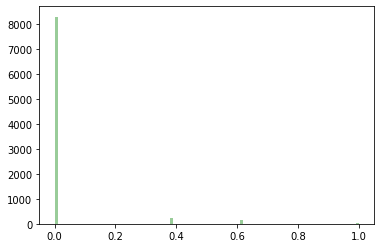

In [76]:
# Run with upsample 1

sr = StackingRegressor(models, GradientBoostingRegressor(), features)
sr.fit(X_norm, y)
y_pred = sr.predict(X_test_norm)

sns.distplot(y_pred, kde = False, bins = 100, color = "green")

y_result = np.where(y_pred > 0.5, 1, 0)
pd.Series(y_result).value_counts()

0    8614
1     104
dtype: int64

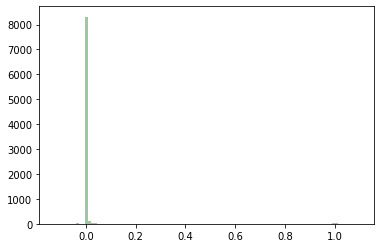

In [77]:
# upsample 1

sr = StackingRegressor(models2, GradientBoostingRegressor(), features)
sr.fit(X_norm, y)
y_pred = sr.predict(X_test_norm)

sns.distplot(y_pred, kde = False, bins = 100, color = "green")

y_result = np.where(y_pred > 0.5, 1, 0)
pd.Series(y_result).value_counts()

0    8523
1     195
dtype: int64

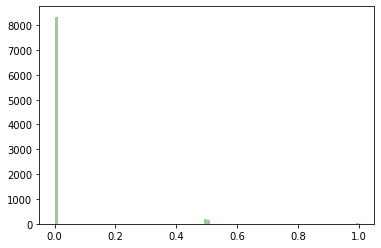

In [75]:
# Run with upsample 2

sr = StackingRegressor(models, GradientBoostingRegressor(), features)
sr.fit(X_norm2, y2)
y_pred = sr.predict(X_test_norm)

sns.distplot(y_pred, kde = False, bins = 100, color = "green")

y_result = np.where(y_pred > 0.5, 1, 0)
pd.Series(y_result).value_counts()

0    8608
1     110
dtype: int64

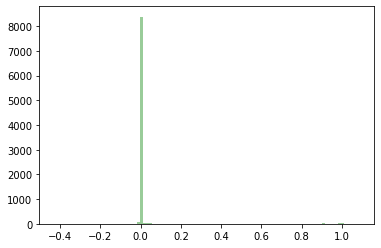

In [68]:
# upsample 2

sr = StackingRegressor(models2, GradientBoostingRegressor(), features)
sr.fit(X_norm2, y2)
y_pred = sr.predict(X_test_norm)

sns.distplot(y_pred, kde = False, bins = 100, color = "green")

y_result = np.where(y_pred > 0.5, 1, 0)
pd.Series(y_result).value_counts()

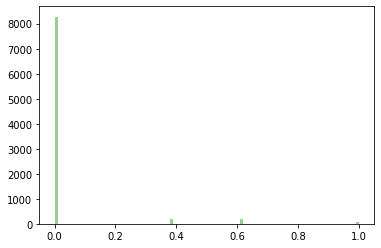

In [31]:
sr = StackingRegressor(models, GradientBoostingRegressor(), features)
sr.fit(X_norm, y)
y_pred = sr.predict(X_test_norm)

sns.distplot(y_pred, kde = False, bins = 100, color = "green")

In [32]:
y_result = np.where(y_pred > 0.5, 1, 0)
pd.Series(y_result).value_counts()

0    8466
1     252
dtype: int64

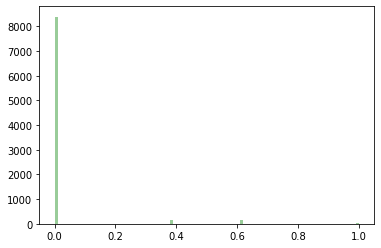

In [86]:
# upsample 3

sr = StackingRegressor(models, GradientBoostingRegressor(), features)
sr.fit(X_norm3, y3)
y_pred = sr.predict(X_test_norm)

sns.distplot(y_pred, kde = False, bins = 100, color = "green")

y_result = np.where(y_pred > 0.5, 1, 0)
pd.Series(y_result).value_counts()

submission = pd.DataFrame({
    "id": stk_test["id"],
    "stroke_in_2018": y_pred
})
submission.to_csv("../submission/submission_3_upsampling3_models.csv", index=False)

0    8515
1     203
dtype: int64

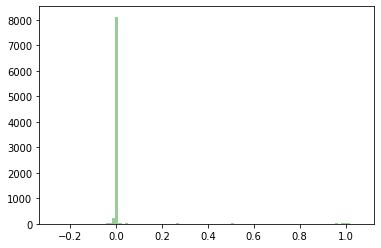

In [84]:
# upsample 3

sr = StackingRegressor(models2, GradientBoostingRegressor(), features)
sr.fit(X_norm3, y3)
y_pred = sr.predict(X_test_norm)

sns.distplot(y_pred, kde = False, bins = 100, color = "green")

y_result = np.where(y_pred > 0.5, 1, 0)
pd.Series(y_result).value_counts()

0    8635
1      83
dtype: int64

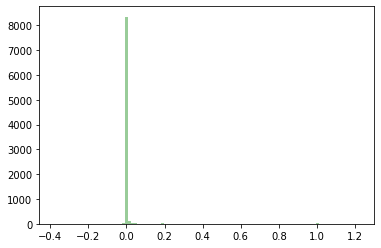

In [81]:
# upsample 3

sr = StackingRegressor(models3, GradientBoostingRegressor(), features)
sr.fit(X_norm3, y3)
y_pred = sr.predict(X_test_norm)

sns.distplot(y_pred, kde = False, bins = 100, color = "green")

y_result = np.where(y_pred > 0.5, 1, 0)
pd.Series(y_result).value_counts()

__Mysteries...__

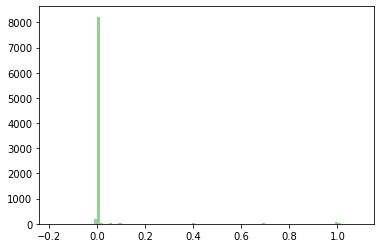

In [167]:
sr = StackingRegressor(models2, GradientBoostingRegressor(), features)
sr.fit(X_norm, y)
y_pred = sr.predict(X_test_norm)

sns.distplot(y_pred, kde = False, bins = 100, color = "green")

In [168]:
y_result = np.where(y_pred > 0.8, 1, 0)
pd.Series(y_result).value_counts()

0    8620
1      98
dtype: int64

In [ ]:
# upsample 2

sr = StackingRegressor(models2, GradientBoostingRegressor(), features)
sr.fit(X_norm2, y2)
y_pred = sr.predict(X_test_norm)

sns.distplot(y_pred, kde = False, bins = 100, color = "green")

y_result = np.where(y_pred > 0.5, 1, 0)
pd.Series(y_result).value_counts()

0    8602
1     116
dtype: int64

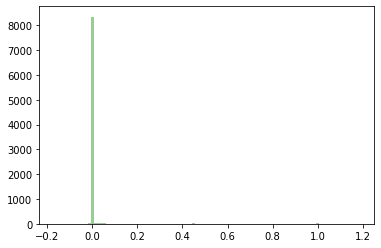

In [102]:
# upsample 4

sr = StackingRegressor(models2, GradientBoostingRegressor(), features)
sr.fit(X_norm4, y4)
y_pred = sr.predict(X_test_norm)

sns.distplot(y_pred, kde = False, bins = 100, color = "green")

y_result = np.where(y_pred > 0.5, 1, 0)
pd.Series(y_result).value_counts()

0    8471
1     247
dtype: int64


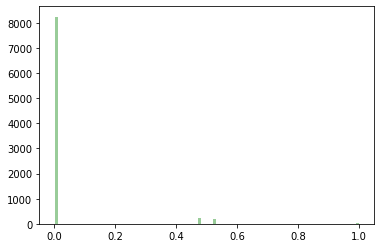

In [112]:
# upsample 4

sr = StackingRegressor(models, GradientBoostingRegressor(), features)
sr.fit(X_norm4, y4)
y_pred = sr.predict(X_test_norm)

sns.distplot(y_pred, kde = False, bins = 100, color = "green")

y_result = np.where(y_pred > 0.5, 1, 0)
print(pd.Series(y_result).value_counts())

submission = pd.DataFrame({
    "id": stk_test["id"],
    "stroke_in_2018": y_pred
})
submission.to_csv("../submission/submission_5_upsample4_model.csv", index=False)

0    8601
1     117
dtype: int64


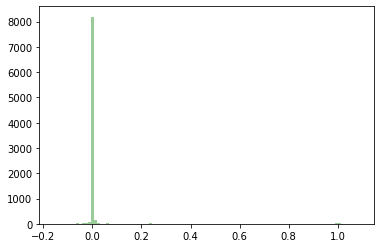

In [111]:
# upsample 4

sr = StackingRegressor(models3, GradientBoostingRegressor(), features)
sr.fit(X_norm4, y4)
y_pred = sr.predict(X_test_norm)

sns.distplot(y_pred, kde = False, bins = 100, color = "green")

y_result = np.where(y_pred > 0.5, 1, 0)
print(pd.Series(y_result).value_counts())

submission = pd.DataFrame({
    "id": stk_test["id"],
    "stroke_in_2018": y_pred
})
submission.to_csv("../submission/submission_4_upsample4_model3.csv", index=False)

In [107]:
y_result = np.where(y_pred > 0.8, 1, 0)
pd.Series(y_result).value_counts()

0    8585
1     133
dtype: int64

### Submissions

In [ ]:
# We still don't know which dataset the first submission used. 

sr = StackingRegressor(models2, GradientBoostingRegressor(), features)
sr.fit(X_norm, y)
y_pred = sr.predict(X_test_norm)

sns.distplot(y_pred, kde = False, bins = 100, color = "green")

# submission = pd.DataFrame({
#     "id": stk_test["id"],
#     "stroke_in_2018": y_pred
# })
# submission.to_csv("../submission/submission_1.csv", index=False)

In [45]:
# WHICH DATA SET????



# sr = StackingRegressor(models2, GradientBoostingRegressor(), features)
# sr.fit(X_norm, y)
# y_pred = sr.predict(X_test_norm)

# sns.distplot(y_pred, kde = False, bins = 100, color = "green")

# y_result = np.where(y_pred > 0.5, 1, 0)
# pd.Series(y_result).value_counts()

# 8616
# 102

# y_result = np.where(y_pred > 0.3, 1, 0)
# pd.Series(y_result).value_counts()

# 8588
# 130

# submission2 = pd.DataFrame({
#     "id": stk_test["id"],
#     "stroke_in_2018": y_pred
# })
# submission2.to_csv("../submission/submission_2.csv", index=False)

# 0.65

In [46]:
# stk = pd.read_csv("../data/train_processed_upsampled.csv")
# stk.head()

# models = [
#     GradientBoostingRegressor(), RandomForestRegressor(), ExtraTreesRegressor(), 
#     Lasso(), LinearRegression(), Ridge()
# ]

# sr = StackingRegressor(models, GradientBoostingRegressor(), features)
# sr

# 0 8539
# 1 179

fitting the model
0    8329
1     389
dtype: int64
writing to csv


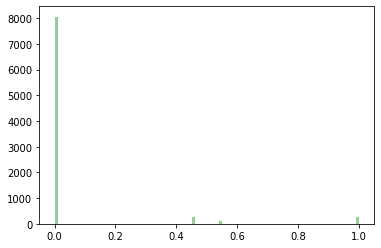

In [171]:
stk = pd.read_csv("../data/train_processed_upsampled.csv")
stk.head()

models = [
    GradientBoostingRegressor(), RandomForestRegressor(), ExtraTreesRegressor(), 
    Lasso(), LinearRegression(), Ridge()
]

X = stk.drop(labels="stroke_in_2018", axis=1).reset_index(drop=True)
y = stk["stroke_in_2018"].reset_index(drop=True)

X_norm = X.copy()
norm_cols(X_norm, ["average_blood_sugar", "BMI", "age_corr"])

print("fitting the model")
sr = StackingRegressor(models, GradientBoostingRegressor(), features)
sr.fit(X_norm, y)
y_pred = sr.predict(X_test_norm)

sns.distplot(y_pred, kde = False, bins = 100, color = "green")

y_result = np.where(y_pred > 0.5, 1, 0)
print(pd.Series(y_result).value_counts())

print("writing to csv")
submission = pd.DataFrame({
    "id": stk_test["id"],
    "stroke_in_2018": y_pred
})
# submission.to_csv("../submission/submission_9_upsampling_models.csv", index=False)

# 0.60

In [169]:
stk = pd.read_csv("../data/train_processed_upsampled2.csv")
stk.head()

models = [
    GradientBoostingRegressor(), RandomForestRegressor(), ExtraTreesRegressor(), 
    Lasso(), LinearRegression(), Ridge()
]

X = stk.drop(labels="stroke_in_2018", axis=1).reset_index(drop=True)
y = stk["stroke_in_2018"].reset_index(drop=True)

X_norm = X.copy()
norm_cols(X_norm, ["average_blood_sugar", "BMI", "age_corr"])

print("fitting the model")
sr = StackingRegressor(models, GradientBoostingRegressor(), features)
sr.fit(X_norm, y)
y_pred = sr.predict(X_test_norm)

print("")
submission = pd.DataFrame({
    "id": stk_test["id"],
    "stroke_in_2018": y_pred
})
submission.to_csv("../submission/submission_8_upsampling2_models.csv", index=False)

# 0.51

In [47]:
pd.Series(y_pred).unique()
pd.Series(y_pred).value_counts()

 0.000015    5608
 0.000079    1165
 0.000264     239
 0.000142     164
-0.000261     117
-0.000022      65
-0.000087      62
-0.000037      59
-0.000159      37
 0.008758      37
-0.000139      28
 0.001584      27
-0.000043      24
-0.000261      23
-0.000144      22
 0.007636      19
-0.000118      19
 0.001205      18
-0.000608      16
 0.012784      14
 0.007820      13
-0.046492      13
 0.011662      12
 0.010562      12
-0.000846      11
 0.002516      11
 0.004206      11
 0.000451      10
 0.002451      10
 0.008822       9
             ... 
-0.019793       1
 0.456828       1
 0.019530       1
 0.002152       1
 0.012352       1
-0.034336       1
 0.006103       1
 0.340047       1
 0.123588       1
 0.000633       1
-0.045566       1
-0.005442       1
-0.041203       1
 0.996220       1
-0.000696       1
-0.000098       1
 0.319718       1
 0.827448       1
 0.628173       1
 0.581904       1
 1.011289       1
 0.985148       1
-0.000392       1
-0.078451       1
 1.081459 

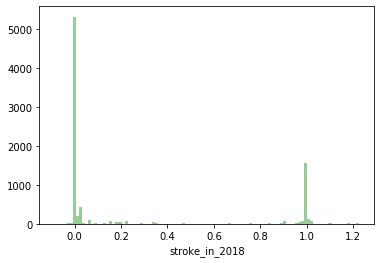

In [160]:
submission1 = pd.read_csv("../submission/submission_1.csv")
sns.distplot(submission1["stroke_in_2018"], kde = False, bins = 100, color = "green")

In [164]:
submission1["stroke_in_2018_test"] = np.where(submission1["stroke_in_2018"] > 0.8, 1, 0)
print(submission1["stroke_in_2018_test"].value_counts())

0    6592
1    2126
Name: stroke_in_2018_test, dtype: int64


In [165]:
submission1.to_csv("../submission/submission_7_npwhere_0.8_upsampling2_not_sure.csv", index=False)

### Submission of Base Features

I still think upsampled 2 is the best one so far. 

So now we create the test sample with only base features

In [134]:
stk = pd.read_csv("../data/train_processed_upsampled2.csv")
stk.head()

X = stk.drop(labels="stroke_in_2018", axis=1).reset_index(drop=True)
y = stk["stroke_in_2018"].reset_index(drop=True)

X_norm = X[['average_blood_sugar', 'BMI', 'age_corr', 'high_BP_0', 'high_BP_1',
       'smoker_status_active_smoker', 'smoker_status_non_smoker',
       'smoker_status_quit', 'married_0', 'married_1',
       'heart_condition_detected_2017_0', 'heart_condition_detected_2017_1',
       'job_status_corr_business_owner', 'job_status_corr_government',
       'job_status_corr_parental_leave', 'job_status_corr_private_sector',
       'job_status_corr_unemployed', 'living_area_corr_city',
       'living_area_corr_remote']].copy()
norm_cols(X_norm, ["average_blood_sugar", "BMI", "age_corr"])

In [114]:
stk_test = pd.read_csv("../data/test_processed_feature_engineered.csv")
stk_test.head()

X_test = stk_test[['average_blood_sugar', 'BMI', 'age_corr', 'high_BP_0', 'high_BP_1',
       'smoker_status_active_smoker', 'smoker_status_non_smoker',
       'smoker_status_quit', 'married_0', 'married_1',
       'heart_condition_detected_2017_0', 'heart_condition_detected_2017_1',
       'job_status_corr_business_owner', 'job_status_corr_government',
       'job_status_corr_parental_leave', 'job_status_corr_private_sector',
       'job_status_corr_unemployed', 'living_area_corr_city',
       'living_area_corr_remote']].copy()
X_test_norm = X_test.copy()
norm_cols(X_test_norm, ["average_blood_sugar", "BMI", "age_corr"])

In [138]:
models = [
        GradientBoostingRegressor(), RandomForestRegressor(), ExtraTreesRegressor(),
        LinearRegression(), Ridge()
]

linear_based_models = {
    "en": ElasticNet(),
    "hr": HuberRegressor(),
    "lr": LinearRegression(),
    "ridge": Ridge(),
    "lasso": Lasso(),
    "sgd": SGDRegressor(), 
    "pa": PassiveAggressiveRegressor()
}

tree_based_models = {
    "dt": DecisionTreeRegressor(),
    "rf": RandomForestRegressor(),
    "ada": AdaBoostRegressor(),
    "gb": GradientBoostingRegressor(),
    "et": ExtraTreesRegressor(),
    "xgb": XGBRegressor()
}

tree_model_best_features = [
    'married_0',
    'smoker_status_active_smoker',
    'smoker_status_quit',
    'job_status_corr_business_owner',
    'job_status_corr_private_sector',
    'living_area_corr_city',
    'job_status_corr_government',
    'smoker_status_non_smoker',
    'BMI',
    'average_blood_sugar',
    'heart_condition_detected_2017_1',
    'age_corr',
    'living_area_corr_remote',
    'heart_condition_detected_2017_0'
]

linear_model_selected_features = [
    'job_status_corr_government',
    'smoker_status_non_smoker',
    'BMI',
    'age_corr',
    'married_0',
    'smoker_status_quit',
    'job_status_corr_unemployed',
    'job_status_corr_business_owner',
    'job_status_corr_parental_leave',
    'job_status_corr_private_sector',
    'smoker_status_active_smoker',
    'high_BP_1',
    'high_BP_0',
    'heart_condition_detected_2017_1',
    'heart_condition_detected_2017_0',
    'living_area_corr_remote',
    'average_blood_sugar',
    'married_1',
    'living_area_corr_city'
]

features = [
    ("tree", tree_model_best_features),
    ("linear", linear_model_selected_features)
]


0    8584
1     134
dtype: int64


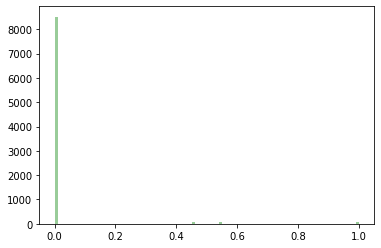

In [141]:
# upsample 2

sr = StackingRegressor(models, GradientBoostingRegressor(), features)
sr.fit(X_norm, y)
y_pred = sr.predict(X_test_norm)

sns.distplot(y_pred, kde = False, bins = 100, color = "green")

y_result = np.where(y_pred > 0.5, 1, 0)
print(pd.Series(y_result).value_counts())

submission = pd.DataFrame({
    "id": stk_test["id"],
    "stroke_in_2018": y_pred
})
submission.to_csv("../submission/submission_6_upsample2_models_base_feature.csv", index=False)